# preparing brats PED dataset for NVIDIA model
. changing folders and files names to match BraTS2021 dataset

In [23]:
# extracting the contents of the "BraTS2021_Training_Data.tar"
!tar -xvf  "/media/workstation04/New Volume/MMMAI/BraTSData/BraTS2021_Training_Data.tar" -C "/home/workstation04/GP_MMMAI/All_Data"

tar: /home/workstation04/GP_MMMAI/All_Data: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [24]:
# unzipping brats PED data(only once)
!unzip "/media/workstation04/New Volume/MMMAI/BraTSData/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData.zip" -d "/home/workstation04/GP_MMMAI/PED"

Archive:  /media/workstation04/New Volume/MMMAI/BraTSData/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData.zip
   creating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/
   creating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00020-000/
  inflating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00020-000/BraTS-PED-00020-000-t2f.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00020-000/BraTS-PED-00020-000-t1c.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00020-000/BraTS-PED-00020-000-t2w.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00020-000/BraTS-PED-00020-000-t1n.nii.gz  
  inflating: /home/workstation04/GP_MMMAI/PED/ASNR-MICCAI-BraTS2023-PED-Challenge-Tra

#### visualisation and comparing to brats2021 dataset

In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

def read_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    return data

def generate_legend(color_map, labels):
    legend_elements = [Patch(color=color_map[label], label=f"Label {label}") for label in labels]
    return legend_elements

def visualize_segmentation(image, segmentation, color_map, slice_no,flag):
    unique_labels = np.unique(segmentation)
    
    # Display original image
    plt.subplot(1, 2, 1)
    if flag:
        plt.imshow(image[:,:,slice_no,0], cmap='gray')
    else:     
        plt.imshow(image[:,:,slice_no], cmap='gray')

    plt.title("Original Image")

    # Display segmentation
    plt.subplot(1, 2, 2)
    overlay = np.zeros_like(segmentation)

    for label in unique_labels:
        mask = (segmentation == label)
        overlay[mask] = label

    cmap = ListedColormap([color_map[label] for label in unique_labels])
    plt.imshow(overlay[:,:,slice_no], cmap=cmap, vmin=0, vmax=len(color_map)-1)
    plt.title("Segmentation Overlay")

    # Display legend
    legend_elements = generate_legend(color_map, unique_labels)
    plt.legend(handles=legend_elements, loc='lower right')

    plt.show()

Segmentation Dimensions: (240, 240, 155)
Segmentation labels: [0. 1. 2. 3.]


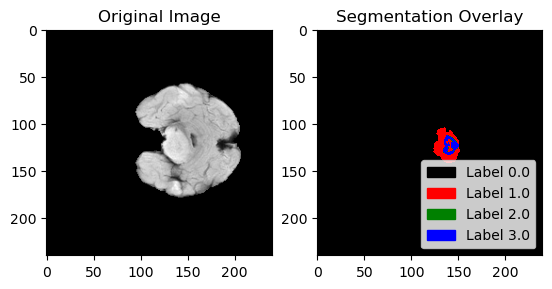

In [ ]:
# BraTS PED
image_path = "/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00064-000/BraTS-PED-00064-000-t2f.nii.gz"
segmentation_path = "/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData/BraTS-PED-00064-000/BraTS-PED-00064-000-seg.nii.gz"
# Read NIfTI files
image_data = read_nifti(image_path)
segmentation_data = read_nifti(segmentation_path)

# Display dimensions of the segmentation file
print(f"Segmentation Dimensions: {segmentation_data.shape}")

# Define the colormap based on specified labels and colors
labels = np.unique(segmentation_data)
print(f"Segmentation labels: {labels}")

colors = ['black', 'red', 'green', 'blue']
color_map = dict(zip(labels, colors))

# Visualize segmentation overlay
visualize_segmentation(image_data, segmentation_data, color_map, 40, 0)

### 2 things should be changed
1. sequences naming 
2. segmentation labels
```
    . labels in BraTS2021 :{"0": "background", "1": "non-enhancing tumor", "2": "edema", "4": "enhancing tumour"}
    . labels in BraTS PED :{"0": "background", "1": "non-enhancing tumor", "2": "edema", "3": "enhancing tumour"}
    . 3 --> 4
```



In [ ]:
def modify_seg_file(seg_file_path):
    img = nib.load(seg_file_path)
    data = img.get_fdata()
    # Modify segmentation values
    data[data == 3] = 4

    # Save the modified segmentation file
    nib.save(nib.Nifti1Image(data, img.affine), seg_file_path)

In [ ]:
# change sequence naming of africa dataset to match BraTS2021



import os

folder_path = '/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'  # Replace with the actual path to your folder

for subdir, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.startswith('BraTS-PED-') and file_name.endswith('.nii.gz'):
            old_file_path = os.path.join(subdir, file_name)
            parts = file_name.split('-')
            file_prefix = parts[2]
            file_suffix = parts[4].split('.')[0]

            if 'seg' not in file_suffix:
                if 't1c' in file_suffix:
                    file_suffix = file_suffix.replace('t1c', 't1ce')
                if 't1n' in file_suffix:
                    file_suffix = file_suffix.replace('t1n', 't1')
                if 't2f' in file_suffix:
                    file_suffix = file_suffix.replace('t2f', 'flair')
                if 't2w' in file_suffix:
                    file_suffix = file_suffix.replace('t2w', 't2')
            else:
                modify_seg_file(os.path.join(folder_path,subdir ,file_name))        

            new_file_name = 'BraTS-PED_{}_{}.nii.gz'.format(file_prefix, file_suffix)
            new_file_path = os.path.join(subdir, new_file_name)
            os.rename(old_file_path, new_file_path)


In [ ]:
# changing folders named to match BraTS2021
import os
import csv

folder_path = '/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'  # Replace with the actual path to your folder
folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
file_prefix = 1667

# Create and open the CSV file for writing
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED/BraTS_PED_rename.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = ['Old Name', 'New Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    # Iterate through each folder
    for old_name in folders:
        new_file_name = 'BraTS2021_0{}'.format(file_prefix)
        old_file_path = os.path.join(folder_path, old_name)
        new_file_path = os.path.join(folder_path, new_file_name)
        
        # Rename the folder
        os.rename(old_file_path, new_file_path)
        
        # Write the old and new names to the CSV file
        writer.writerow({'Old Name': old_name, 'New Name': new_file_name})
        
        file_prefix += 1

print("Folder renaming and CSV file creation completed.")


Folder renaming and CSV file creation completed.


In [ ]:
# to rename with the same naming map

import os
import csv

folder_path = '/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'  # Replace with the actual path to your folder
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Testing/BraTS_PED_rename.csv'

# Create a dictionary to store the mapping of old names to new names
name_mapping = {}

# Read the CSV file and populate the name mapping dictionary
with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        name_mapping[row['Old Name']] = row['New Name']

# Iterate through each folder and rename according to the mapping
for old_name, new_name in name_mapping.items():
    old_file_path = os.path.join(folder_path, old_name)
    new_file_path = os.path.join(folder_path, new_name)
    
    # Rename the folder
    os.rename(old_file_path, new_file_path)
    print(f'Renamed folder from {old_name} to {new_name}')

print("Folder renaming completed.")


Renamed folder from BraTS-PED-00002-000 to BraTS2021_01667
Renamed folder from BraTS-PED-00003-000 to BraTS2021_01668
Renamed folder from BraTS-PED-00004-000 to BraTS2021_01669
Renamed folder from BraTS-PED-00006-000 to BraTS2021_01670
Renamed folder from BraTS-PED-00008-000 to BraTS2021_01671
Renamed folder from BraTS-PED-00009-000 to BraTS2021_01672
Renamed folder from BraTS-PED-00010-000 to BraTS2021_01673
Renamed folder from BraTS-PED-00019-000 to BraTS2021_01674
Renamed folder from BraTS-PED-00020-000 to BraTS2021_01675
Renamed folder from BraTS-PED-00021-000 to BraTS2021_01676
Renamed folder from BraTS-PED-00023-000 to BraTS2021_01677
Renamed folder from BraTS-PED-00024-000 to BraTS2021_01678
Renamed folder from BraTS-PED-00025-000 to BraTS2021_01679
Renamed folder from BraTS-PED-00026-000 to BraTS2021_01680
Renamed folder from BraTS-PED-00032-000 to BraTS2021_01681
Renamed folder from BraTS-PED-00036-000 to BraTS2021_01682
Renamed folder from BraTS-PED-00037-000 to BraTS2021_016

In [ ]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED/BraTS_PED_rename.csv'

# Read the CSV file as a DataFrame
df = pd.read_csv(csv_file_path)

# Print the DataFrame
print(df)


               Old Name         New Name
0   BraTS-PED-00002-000  BraTS2021_01667
1   BraTS-PED-00003-000  BraTS2021_01668
2   BraTS-PED-00004-000  BraTS2021_01669
3   BraTS-PED-00006-000  BraTS2021_01670
4   BraTS-PED-00008-000  BraTS2021_01671
..                  ...              ...
94  BraTS-PED-00096-000  BraTS2021_01761
95  BraTS-PED-00097-000  BraTS2021_01762
96  BraTS-PED-00050-000  BraTS2021_01763
97  BraTS-PED-00098-000  BraTS2021_01764
98  BraTS-PED-00124-000  BraTS2021_01765

[99 rows x 2 columns]


In [ ]:
# change naming of PED dataset to match BraTS2021
import os

folder_path = '/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'  # Replace with the actual path to your folder

for subdir, dirs, files in os.walk(folder_path):

    for file_name in files:
        if file_name.startswith('BraTS-PED_') and file_name.endswith('.nii.gz'):
            old_file_path = os.path.join(subdir, file_name)
            folder_name = os.path.basename(os.path.dirname(old_file_path))
            parts = file_name.split('_')
            file_suffix = parts[2]
            new_file_name = '{}_{}'.format(folder_name, file_suffix)
            new_file_path = os.path.join(subdir, new_file_name)
            os.rename(old_file_path, new_file_path)


### Take random 10 samples to be a test set

In [ ]:
import os
import csv
import random
import shutil

# Path to the folder containing the data
folder_path = '/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'

# Path to the CSV file containing old and new folder names
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Testing/BraTS_PED_rename.csv'

# Path to the test folder where the selected folders will be moved
test_folder_path = '/home/workstation04/GP_MMMAI/PED_testset'


# Read the new names from the CSV file
new_names = []
with open(csv_file_path, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        new_names.append(row['New Name'])

# Randomly select 10 folder names for the test set
test_folders = random.sample(new_names, 10)

# Move the selected folders to the test folder
for folder_name in test_folders:
    src_folder_path = os.path.join(folder_path, folder_name)
    dest_folder_path = os.path.join(test_folder_path, folder_name)
    shutil.move(src_folder_path, dest_folder_path)

# Write the selected folder names to a new CSV file
picked_samples_csv_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/testset.csv'
with open(picked_samples_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['Sample Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for folder_name in test_folders:
        writer.writerow({'Sample Name': folder_name})

# Write the unpicked folder names to a new CSV file
unpicked_samples = set(new_names) - set(test_folders)
unpicked_samples_csv_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelledpool.csv'
with open(unpicked_samples_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['Sample Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for folder_name in unpicked_samples:
        writer.writerow({'Sample Name': folder_name})

print("Test folders moved to test folder, picked sample names saved in a CSV file, and unpicked sample names saved in another CSV file.")

Test folders moved to test folder, picked sample names saved in a CSV file, and unpicked sample names saved in another CSV file.


In [ ]:
import pandas as pd

# Path to the CSV file
csv_file_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/testset.csv'
# Read the CSV file as a DataFrame
df = pd.read_csv(csv_file_path)
# Print the DataFrame
print(df)


       Sample Name
0  BraTS2021_01710
1  BraTS2021_01701
2  BraTS2021_01705
3  BraTS2021_01762
4  BraTS2021_01738
5  BraTS2021_01696
6  BraTS2021_01674
7  BraTS2021_01739
8  BraTS2021_01748
9  BraTS2021_01730


In [ ]:
import shutil
import os

def copy_folder_contents(source_folder, destination_folder):

    # Ensure the destination folder exists; create it if not
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    # Get the list of files and subdirectories in the source folder
    contents = os.listdir(source_folder)

    # Iterate over each item in the source folder
    for item in contents:
        # Create the full path of the item in the source folder
        source_path = os.path.join(source_folder, item)

        # Create the full path of the item in the destination folder
        destination_path = os.path.join(destination_folder, item)

        # Copy the item to the destination folder
        if os.path.isdir(source_path):
            # If the item is a directory, recursively copy its contents
            shutil.copytree(source_path, destination_path)
        else:
            # If the item is a file, copy it
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'
destination_folder = '/home/workstation04/GP_MMMAI/data/BraTS2021_train'

copy_folder_contents(source_folder, destination_folder)

-------------------------------------------
## Random Sampling



In [ ]:
import os
import csv
import random
import shutil

# Path to the folder containing the data
folder_path = '/home/workstation04/GP_MMMAI/data/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'

# Path to the folder where selected folders will be copied
random_folder_path = '/home/workstation04/GP_MMMAI/BraTS2021_PED_Random'

# Read folder names from the data folder
folder_names = os.listdir(folder_path)

# Randomly select 20 folder names
selected_folders = random.sample(folder_names, 20)


# Copy the selected folders to the random folder
for folder_name in selected_folders:
    src_folder_path = os.path.join(folder_path, folder_name)
    dest_folder_path = os.path.join(random_folder_path, folder_name)
    shutil.copytree(src_folder_path, dest_folder_path)

# Write the selected folder names to a CSV file
selected_samples_csv_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/random_selected_samples.csv'
with open(selected_samples_csv_path, 'w', newline='') as csvfile:
    fieldnames = ['Sample Name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for folder_name in selected_folders:
        writer.writerow({'Sample Name': folder_name})

print("Selected folders copied to the random folder, and names saved in a CSV file.")


Selected folders copied to the random folder, and names saved in a CSV file.


-----------------------------------------------------------
# Prepare Data

- this path /home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2 is changed to /home/workstation04/GP_MMMAI/data/BraTS2021_train

In [ ]:
import json
import os
from glob import glob
from subprocess import call
import time
import nibabel
import numpy as np
from joblib import Parallel, delayed
from skimage.exposure import rescale_intensity
from scipy.ndimage.measurements import label
import matplotlib.pyplot as plt


# Preparing the data for the model
def get_folder_paths(directory):
    folder_paths = [os.path.join(directory, folder) for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
    return folder_paths


# Function to load a NIfTI file
def load_nifty(directory, example_id, suffix):
    return nibabel.load(os.path.join(directory, example_id + "_" + suffix + ".nii.gz"))

# Function to load all sequences for a given example
def load_channels(d, example_id):
    return [load_nifty(d, example_id, suffix) for suffix in ["flair", "t1", "t1ce", "t2"]]

# Function to get data from a NIfTI file
def get_data(nifty, dtype="int16"):
    if dtype == "int16":
        data = np.abs(nifty.get_fdata().astype(np.int16))
        data[data == -32768] = 0
        return data
    return nifty.get_fdata().astype(np.uint8)

# Function to prepare a NIfTI file
def prepare_nifty(d):
    example_id = d.split("/")[-1]
    flair, t1, t1ce, t2 = load_channels(d, example_id)
    affine, header = t1.affine, t1.header
    vol = np.stack([get_data(flair), get_data(t1), get_data(t1ce), get_data(t2)], axis=-1)
    vol = nibabel.nifti1.Nifti1Image(vol, affine, header=header)
    nibabel.save(vol, os.path.join(d, example_id + ".nii.gz"))

    if os.path.exists(os.path.join(d, example_id + "_seg.nii.gz")):
        seg = load_nifty(d, example_id, "seg")
        affine, header = seg.affine, seg.header
        vol = get_data(seg, "unit8")
        # changing label 4 with 3 (for Brats dataset)
        vol[vol == 4] = 3
        seg = nibabel.nifti1.Nifti1Image(vol, affine, header=header)
        nibabel.save(seg, os.path.join(d, example_id + "_seg.nii.gz"))

# making the model's required file structure
def prepare_dirs(data, train):
    img_path, lbl_path = os.path.join(data, "images"), os.path.join(data, "labels")
    call(f"mkdir {img_path}", shell=True)
    if train:
        call(f"mkdir {lbl_path}", shell=True)


    dirs = glob(os.path.join(data, "BraTS*"))    #hard code
    # dirs = glob(os.path.join(data, "ASH*"))
    for d in dirs:
        if "_" in d.split("/")[-1]:
            files = glob(os.path.join(d, "*.nii.gz"))
            for f in files:
                if "flair" in f or "t1" in f or "t1ce" in f or "t2" in f:
                    continue
                if "_seg" in f:
                    call(f"mv {f} {lbl_path}", shell=True)
                else:
                    call(f"mv {f} {img_path}", shell=True)
        call(f"rm -rf {d}", shell=True)


# making the model's required json file
def prepare_dataset_json(data, train):
    images, labels = glob(os.path.join(data, "images", "*")), glob(os.path.join(data, "labels", "*"))
    images = sorted([img.replace(data + "/", "") for img in images])
    labels = sorted([lbl.replace(data + "/", "") for lbl in labels])

    modality = {"0": "FLAIR", "1": "T1", "2": "T1CE", "3": "T2"}
    labels_dict = {"0": "background", "1": "edema", "2": "non-enhancing tumor", "3": "enhancing tumour"}
    if train:
        key = "training"
        print("images", images)
        print("labels", labels)
        data_pairs = [{"image": img, "label": lbl} for (img, lbl) in zip(images, labels)]
    else:
        key = "test"
        data_pairs = [{"image": img} for img in images]

    dataset = {
        "labels": labels_dict,
        "modality": modality,
        key: data_pairs,
    }

    with open(os.path.join(data, "dataset.json"), "w") as outfile:
        json.dump(dataset, outfile)

# Function to run a function in parallel
def run_parallel(func, args):
    return Parallel(n_jobs=os.cpu_count())(delayed(func)(arg) for arg in args)

# Main function to prepare the dataset
def prepare_dataset(data, train):
    print(f"Preparing BraTS21 dataset from: {data}")
    start = time.time()
    run_parallel(prepare_nifty, sorted(glob(os.path.join(data, "BraTS*"))))   #hard code
    # run_parallel(prepare_nifty, sorted(glob(os.path.join(data, "ASH*"))))
    prepare_dirs(data, train)
    prepare_dataset_json(data, train)
    end = time.time()
    print(f"Preparing time: {(end - start):.2f}")


/tmp/ipykernel_106541/409192400.py:10: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import label


In [ ]:
# this path '/content/drive/MyDrive/data/BraTS2021_train' should contain the folder containig the data with the ground truth (T1,T2,T1ce,flair,seg)
prepare_dataset("/home/workstation04/GP_MMMAI/data/BraTS2021_train", True)
print("Finished!")

Preparing BraTS21 dataset from: /home/workstation04/GP_MMMAI/data/BraTS2021_train


images ['images/BraTS2021_01667.nii.gz', 'images/BraTS2021_01668.nii.gz', 'images/BraTS2021_01669.nii.gz', 'images/BraTS2021_01670.nii.gz', 'images/BraTS2021_01671.nii.gz', 'images/BraTS2021_01672.nii.gz', 'images/BraTS2021_01673.nii.gz', 'images/BraTS2021_01675.nii.gz', 'images/BraTS2021_01676.nii.gz', 'images/BraTS2021_01677.nii.gz', 'images/BraTS2021_01678.nii.gz', 'images/BraTS2021_01679.nii.gz', 'images/BraTS2021_01680.nii.gz', 'images/BraTS2021_01681.nii.gz', 'images/BraTS2021_01682.nii.gz', 'images/BraTS2021_01683.nii.gz', 'images/BraTS2021_01684.nii.gz', 'images/BraTS2021_01685.nii.gz', 'images/BraTS2021_01686.nii.gz', 'images/BraTS2021_01687.nii.gz', 'images/BraTS2021_01688.nii.gz', 'images/BraTS2021_01689.nii.gz', 'images/BraTS2021_01690.nii.gz', 'images/BraTS2021_01691.nii.gz', 'images/BraTS2021_01692.nii.gz', 'images/BraTS2021_01693.nii.gz', 'images/BraTS2021_01694.nii.gz', 'images/BraTS2021_01695.nii.gz', 'images/BraTS2021_01697.nii.gz', 'images/BraTS2021_01698.nii.gz', 'i

In [ ]:
prepare_dataset("/home/workstation04/GP_MMMAI/BraTS2021_PED_Random", True)
print("Finished!")

Preparing BraTS21 dataset from: /home/workstation04/GP_MMMAI/BraTS2021_PED_Random
images ['images/BraTS2021_00000.nii.gz', 'images/BraTS2021_00002.nii.gz', 'images/BraTS2021_00003.nii.gz', 'images/BraTS2021_00005.nii.gz', 'images/BraTS2021_00006.nii.gz', 'images/BraTS2021_00008.nii.gz', 'images/BraTS2021_00009.nii.gz', 'images/BraTS2021_00011.nii.gz', 'images/BraTS2021_00012.nii.gz', 'images/BraTS2021_00014.nii.gz', 'images/BraTS2021_00016.nii.gz', 'images/BraTS2021_00017.nii.gz', 'images/BraTS2021_00018.nii.gz', 'images/BraTS2021_00019.nii.gz', 'images/BraTS2021_00020.nii.gz', 'images/BraTS2021_00021.nii.gz', 'images/BraTS2021_00022.nii.gz', 'images/BraTS2021_00024.nii.gz', 'images/BraTS2021_00025.nii.gz', 'images/BraTS2021_00026.nii.gz', 'images/BraTS2021_00028.nii.gz', 'images/BraTS2021_00030.nii.gz', 'images/BraTS2021_00031.nii.gz', 'images/BraTS2021_00032.nii.gz', 'images/BraTS2021_00033.nii.gz', 'images/BraTS2021_00035.nii.gz', 'images/BraTS2021_00036.nii.gz', 'images/BraTS2021_0

--------------------------------------------------
# preprocessing

In [ ]:
# Preprocessing the data (NVIDIA nnUNet)
# task 11 is set for brats
# change exec_mode to val --> wont expect seg
!python3 /home/workstation04/GP_MMMAI/Notebooks/NVIDIA_nnUNet/DeepLearningExamples/PyTorch/Segmentation/nnUNet/preprocess.py --task 11  --exec_mode training --data "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/Random_selection/data" --results "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/Random_selection" --ohe
print("Finished!")

2024-03-06 12:56:31.535090: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 12:56:31.535128: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 12:56:31.535908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 12:56:31.607722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 12:56:32.613964: W tensorflow/compiler/

In [ ]:
# Preprocessing the data (NVIDIA nnUNet)
# task 11 is set for brats
# change exec_mode to val --> wont expect seg
!python3 /home/workstation04/GP_MMMAI/Notebooks/NVIDIA_nnUNet/DeepLearningExamples/PyTorch/Segmentation/nnUNet/preprocess.py --task 11  --exec_mode training --data "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/PED_testset/data" --results "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/PED_testset" --ohe
print("Finished!")

2024-03-06 10:29:51.964941: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 10:29:51.964983: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 10:29:51.965022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-06 10:29:51.972582: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 10:29:52.995064: W tensorflow/compiler/

----------------------------------------------------------------------------------------------------------------
# Inference

In [2]:
!python /home/workstation04/GP_MMMAI/Notebooks/NVIDIA_nnUNet/DeepLearningExamples/PyTorch/Segmentation/nnUNet/main.py --exec_mode "predict" --gpus 1 --depth 6 --filters 64 96 128 192 256 384 512 --min_fmap 2 --amp --save_preds --task 11 --data "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/11_3d" --ckpt_path "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/Uncertainty_sampling160/checkpoints/epoch=6-dice=77.58.ckpt" --results "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool" --tta

2024-03-13 19:22:34.577449: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 19:22:34.577492: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 19:22:34.577526: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 19:22:34.584428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 19:22:35.411497: W tensorflow/compiler/

----------------------------------------------------------------------------------------
# Active Learning

## Get volume mask

In [3]:
import pandas as pd
import os
import csv

In [4]:
def create_mask(nifti_data):

    # Create a binary mask: set to 0 where voxel value is 0 in the NIfTI volume, and set to 1 otherwise
    mask = np.where(nifti_data == 0, 0, 1)
    mask = np.transpose(mask, (2, 1, 0)) #(240,240*,155) --> (155,240*,240)

    return mask


In [ ]:
# Load the NIfTI volume
input_nifti_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/data/BraTS2021_train/images/BraTS2021_01668.nii.gz'
nifti_img = nib.load(input_nifti_path)
nifti_img.shape

(240, 240, 155, 4)

Shape of flair_sequence: (240, 240, 155)
Shape of mask: (240, 240, 155)


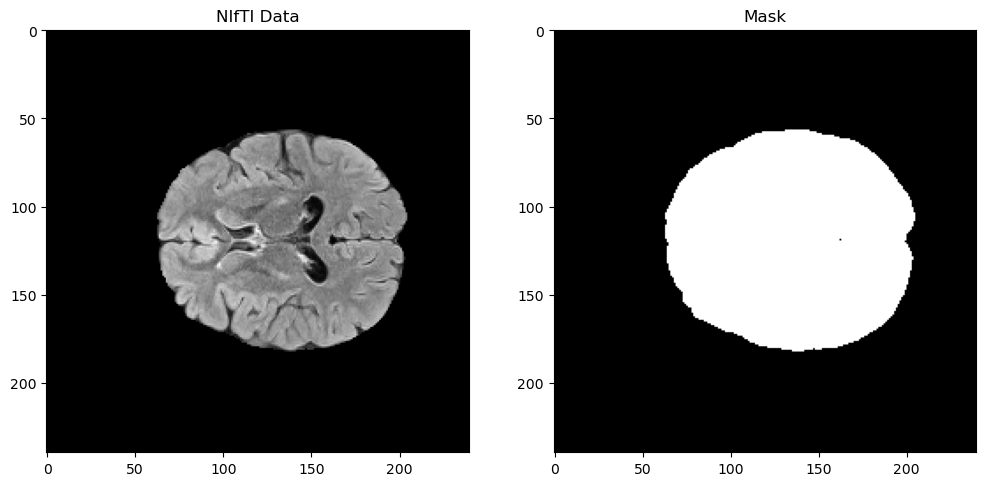

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib


# Load the NIfTI volume
input_nifti_path = '/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/data/BraTS2021_train/images/BraTS2021_01668.nii.gz'
nifti_img = nib.load(input_nifti_path)
nifti_data = nifti_img.get_fdata()
flair_sequence = nifti_data[:,:,:,0]
# Create the mask
mask = create_mask(flair_sequence)

# Print the shapes of flair sequence and mask
print("Shape of flair_sequence:", flair_sequence.shape)
mask = np.transpose(mask, (2, 1, 0))
print("Shape of mask:", mask.shape)
slice_no = flair_sequence.shape[2] // 2
# Plot the NIfTI volume and the mask
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot NIfTI volume
axes[0].imshow(flair_sequence[:,:,slice_no], cmap='gray')
axes[0].set_title('NIfTI Data')

# Plot mask
axes[1].imshow(mask[:,:,slice_no], cmap='gray')
axes[1].set_title('Mask')

plt.show()


### Uncertainty Estimation

### Estimating The Model Uncertainty Using The Entropy

In [5]:
import os
def compute_entropy_with_mask(tensor, mask):
    sum_tensor = np.sum(tensor, axis=0, keepdims=True)
    tensor_normalized = tensor / (sum_tensor + 1e-12)
    entropy_elements = -tensor_normalized * np.log2(tensor_normalized + 1e-12)
    entropy = np.sum(entropy_elements, axis=0)
    # Multiply entropy with the mask
    entropy *= mask

    total_entropy = np.sum(entropy)

    return entropy, total_entropy

In [6]:
folder_path = '/home/workstation04/GP_MMMAI/Ped_unalabelledpool/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'
folders_names = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
folders_names

['BraTS2021_01711',
 'BraTS2021_01727',
 'BraTS2021_01669',
 'BraTS2021_01761',
 'BraTS2021_01716',
 'BraTS2021_01702',
 'BraTS2021_01719',
 'BraTS2021_01757',
 'BraTS2021_01722',
 'BraTS2021_01714',
 'BraTS2021_01704',
 'BraTS2021_01712',
 'BraTS2021_01670',
 'BraTS2021_01671',
 'BraTS2021_01737',
 'BraTS2021_01740',
 'BraTS2021_01726',
 'BraTS2021_01765',
 'BraTS2021_01764',
 'BraTS2021_01687',
 'BraTS2021_01749',
 'BraTS2021_01760',
 'BraTS2021_01676',
 'BraTS2021_01678',
 'BraTS2021_01744',
 'BraTS2021_01690',
 'BraTS2021_01691',
 'BraTS2021_01731',
 'BraTS2021_01667',
 'BraTS2021_01747',
 'BraTS2021_01729',
 'BraTS2021_01700',
 'BraTS2021_01721',
 'BraTS2021_01684',
 'BraTS2021_01680',
 'BraTS2021_01732',
 'BraTS2021_01746',
 'BraTS2021_01707',
 'BraTS2021_01758',
 'BraTS2021_01725',
 'BraTS2021_01750',
 'BraTS2021_01668',
 'BraTS2021_01677',
 'BraTS2021_01682',
 'BraTS2021_01718',
 'BraTS2021_01734',
 'BraTS2021_01754',
 'BraTS2021_01706',
 'BraTS2021_01736',
 'BraTS2021_01697',


In [7]:
len(folders_names)

89

In [8]:
folder_entropy_list = []
for i in range(len(folders_names)):
    # Example usage:

    filename = folders_names[i]
    probability_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/predictions_epoch=6-dice=77_58_task=11_fold=0_tta/{filename}.npy'
    tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)

    input_nifti_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/data/BraTS2021_train/images/{filename}.nii.gz' #make the mask from flair volume
    # Load the NIfTI volume
    nifti_img = nib.load(input_nifti_path)
    nifti_data = nifti_img.get_fdata()
    mask = create_mask(nifti_data[:,:,:,0])

    tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)
    entropy_data, total_entropy = compute_entropy_with_mask(tensor,mask)
    folder_entropy_list.append((filename, total_entropy))



In [ ]:
# from pretrained
sorted_folder_entropy_list = sorted(folder_entropy_list, key=lambda x: x[1], reverse=True)
# Print the sorted list
print(sorted_folder_entropy_list)

[('BraTS2021_01692', 136857.46598669246), ('BraTS2021_01755', 133382.97280784513), ('BraTS2021_01681', 130516.81754813739), ('BraTS2021_01676', 125183.85586787581), ('BraTS2021_01754', 123660.93145828083), ('BraTS2021_01715', 121965.21389311312), ('BraTS2021_01722', 118394.93207099), ('BraTS2021_01678', 101642.80901293331), ('BraTS2021_01669', 97326.75869563964), ('BraTS2021_01736', 97262.21727308337), ('BraTS2021_01688', 96749.86672624337), ('BraTS2021_01687', 96214.44757491047), ('BraTS2021_01727', 88048.26544640963), ('BraTS2021_01670', 84340.50520207071), ('BraTS2021_01731', 77806.90350763354), ('BraTS2021_01704', 77229.43631498405), ('BraTS2021_01713', 70590.77995087317), ('BraTS2021_01733', 70152.86036742317), ('BraTS2021_01671', 69968.59588350264), ('BraTS2021_01729', 69943.21909811348), ('BraTS2021_01672', 69483.76921324416), ('BraTS2021_01714', 69464.6843357376), ('BraTS2021_01759', 68480.8567339985), ('BraTS2021_01706', 68186.51907420807), ('BraTS2021_01709', 67402.9779922986

In [ ]:
# from uncertainty120
sorted_folder_entropy_list = sorted(folder_entropy_list, key=lambda x: x[1], reverse=True)
# Print the sorted list
print(sorted_folder_entropy_list)

[('BraTS2021_01736', 118942.09969958312), ('BraTS2021_01681', 109744.59529287358), ('BraTS2021_01708', 98566.79779197484), ('BraTS2021_01688', 97358.57447068449), ('BraTS2021_01706', 91192.91943499271), ('BraTS2021_01733', 83500.55299426333), ('BraTS2021_01726', 82047.4106709914), ('BraTS2021_01672', 80991.25670987208), ('BraTS2021_01669', 79838.65734413438), ('BraTS2021_01709', 77798.06408656735), ('BraTS2021_01692', 75649.1755072269), ('BraTS2021_01687', 73757.2434884753), ('BraTS2021_01704', 72327.60414178157), ('BraTS2021_01678', 71079.10698279164), ('BraTS2021_01721', 70693.59669504665), ('BraTS2021_01761', 66947.44948694191), ('BraTS2021_01745', 65586.46282044346), ('BraTS2021_01719', 65407.225412095846), ('BraTS2021_01703', 64477.269242227165), ('BraTS2021_01759', 64173.43387275438), ('BraTS2021_01729', 64127.70879491328), ('BraTS2021_01714', 63394.02727447337), ('BraTS2021_01689', 63197.049849686286), ('BraTS2021_01765', 62233.37904992505), ('BraTS2021_01685', 61671.6088110962)

In [30]:
# from uncertainty140
sorted_folder_entropy_list = sorted(folder_entropy_list, key=lambda x: x[1], reverse=True)
# Print the sorted list
print(sorted_folder_entropy_list)

[('BraTS2021_01736', 115613.08201971898), ('BraTS2021_01688', 103148.36531621416), ('BraTS2021_01706', 97366.10955375245), ('BraTS2021_01709', 89121.45306685283), ('BraTS2021_01681', 87025.4660901219), ('BraTS2021_01672', 82065.57142616741), ('BraTS2021_01733', 73607.5804786826), ('BraTS2021_01669', 72241.26988242063), ('BraTS2021_01719', 68171.06811662739), ('BraTS2021_01687', 68069.0228184875), ('BraTS2021_01734', 66426.27215425078), ('BraTS2021_01690', 65192.083629780784), ('BraTS2021_01741', 65084.48200218701), ('BraTS2021_01678', 64432.905361979676), ('BraTS2021_01714', 62120.060993403305), ('BraTS2021_01729', 61997.58755327756), ('BraTS2021_01721', 60270.56316245144), ('BraTS2021_01759', 58771.581273736025), ('BraTS2021_01740', 57381.525324258226), ('BraTS2021_01761', 57089.14554040865), ('BraTS2021_01675', 56317.42253907228), ('BraTS2021_01732', 52476.23594911112), ('BraTS2021_01704', 50844.619531246186), ('BraTS2021_01691', 50689.98779238585), ('BraTS2021_01703', 49854.11038503

In [9]:
# from uncertainty160
sorted_folder_entropy_list = sorted(folder_entropy_list, key=lambda x: x[1], reverse=True)
# Print the sorted list
print(sorted_folder_entropy_list)

[('BraTS2021_01736', 122635.9598217879), ('BraTS2021_01688', 112687.30657420686), ('BraTS2021_01706', 109053.94946424676), ('BraTS2021_01672', 93276.38489212347), ('BraTS2021_01729', 87079.20121380547), ('BraTS2021_01714', 86865.14024096039), ('BraTS2021_01681', 86773.96898274617), ('BraTS2021_01709', 83181.31892901062), ('BraTS2021_01733', 76476.5490754545), ('BraTS2021_01734', 76432.50862675473), ('BraTS2021_01741', 75131.32146773778), ('BraTS2021_01669', 74632.56929791163), ('BraTS2021_01721', 66204.64801139325), ('BraTS2021_01687', 64253.33523578529), ('BraTS2021_01678', 59563.81061800954), ('BraTS2021_01690', 58573.39963457334), ('BraTS2021_01711', 57958.442761431324), ('BraTS2021_01761', 56655.21981854775), ('BraTS2021_01673', 53421.19518681328), ('BraTS2021_01759', 52983.97406021108), ('BraTS2021_01708', 52210.86747154381), ('BraTS2021_01703', 51932.138415735055), ('BraTS2021_01719', 50440.75389841349), ('BraTS2021_01675', 50297.01634498894), ('BraTS2021_01704', 48414.2447941256

In [10]:
# Convert the list of tuples to a NumPy array
sorted_folders_entropy_file = np.array(sorted_folder_entropy_list, dtype=[('name', '<U20'), ('value', '<f8')])

# Save the NumPy array as an .npy file
np.save('/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/sorted_folders_entropy_uncertainty160.npy', sorted_folders_entropy_file)

In [11]:
names = [item[0] for item in sorted_folder_entropy_list]
# Convert the list of names to a NumPy array
names_array = np.array(names)

# Save the NumPy array as an .npy file
np.save('/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/sorted_uncertain_folders_names_uncertainty160.npy', names_array)

In [13]:
import numpy as np
# Load the .npy file
sorted_uncertain_folders_names = np.load('/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/sorted_uncertain_folders_names_pretrained.npy')

# Print the loaded data
print(sorted_uncertain_folders_names[0:20])

['BraTS2021_01692' 'BraTS2021_01755' 'BraTS2021_01681' 'BraTS2021_01676'
 'BraTS2021_01754' 'BraTS2021_01715' 'BraTS2021_01722' 'BraTS2021_01678'
 'BraTS2021_01669' 'BraTS2021_01736' 'BraTS2021_01688' 'BraTS2021_01687'
 'BraTS2021_01727' 'BraTS2021_01670' 'BraTS2021_01731' 'BraTS2021_01704'
 'BraTS2021_01713' 'BraTS2021_01733' 'BraTS2021_01671' 'BraTS2021_01729']


In [15]:
import numpy as np
# Load the .npy file
sorted_uncertain_folders_names1 = np.load('/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/sorted_uncertain_folders_names_uncertainty140.npy')

# Print the loaded data
print(sorted_uncertain_folders_names1)

['BraTS2021_01736' 'BraTS2021_01688' 'BraTS2021_01706' 'BraTS2021_01709'
 'BraTS2021_01681' 'BraTS2021_01672' 'BraTS2021_01733' 'BraTS2021_01669'
 'BraTS2021_01719' 'BraTS2021_01687' 'BraTS2021_01734' 'BraTS2021_01690'
 'BraTS2021_01741' 'BraTS2021_01678' 'BraTS2021_01714' 'BraTS2021_01729'
 'BraTS2021_01721' 'BraTS2021_01759' 'BraTS2021_01740' 'BraTS2021_01761'
 'BraTS2021_01675' 'BraTS2021_01732' 'BraTS2021_01704' 'BraTS2021_01691'
 'BraTS2021_01703' 'BraTS2021_01685' 'BraTS2021_01673' 'BraTS2021_01717'
 'BraTS2021_01697' 'BraTS2021_01689' 'BraTS2021_01702' 'BraTS2021_01727'
 'BraTS2021_01679' 'BraTS2021_01680' 'BraTS2021_01682' 'BraTS2021_01711'
 'BraTS2021_01765' 'BraTS2021_01764' 'BraTS2021_01728' 'BraTS2021_01692'
 'BraTS2021_01722' 'BraTS2021_01745' 'BraTS2021_01742' 'BraTS2021_01763'
 'BraTS2021_01677' 'BraTS2021_01752' 'BraTS2021_01708' 'BraTS2021_01756'
 'BraTS2021_01712' 'BraTS2021_01744' 'BraTS2021_01750' 'BraTS2021_01758'
 'BraTS2021_01726' 'BraTS2021_01720' 'BraTS2021_016

In [35]:
intersection = np.intersect1d(sorted_uncertain_folders_names1[0:20], sorted_uncertain_folders_names[0:20])
intersection

array(['BraTS2021_01669', 'BraTS2021_01678', 'BraTS2021_01681',
       'BraTS2021_01687', 'BraTS2021_01688', 'BraTS2021_01692',
       'BraTS2021_01704', 'BraTS2021_01733', 'BraTS2021_01736'],
      dtype='<U15')

In [36]:
sorted_uncertain_folders_names_filtered = sorted_uncertain_folders_names1[~np.isin(sorted_uncertain_folders_names1, sorted_uncertain_folders_names[0:20])]
sorted_uncertain_folders_names_filtered

array(['BraTS2021_01708', 'BraTS2021_01706', 'BraTS2021_01726',
       'BraTS2021_01672', 'BraTS2021_01709', 'BraTS2021_01721',
       'BraTS2021_01761', 'BraTS2021_01745', 'BraTS2021_01719',
       'BraTS2021_01703', 'BraTS2021_01759', 'BraTS2021_01714',
       'BraTS2021_01689', 'BraTS2021_01765', 'BraTS2021_01685',
       'BraTS2021_01750', 'BraTS2021_01690', 'BraTS2021_01673',
       'BraTS2021_01691', 'BraTS2021_01734', 'BraTS2021_01712',
       'BraTS2021_01741', 'BraTS2021_01728', 'BraTS2021_01682',
       'BraTS2021_01702', 'BraTS2021_01732', 'BraTS2021_01740',
       'BraTS2021_01764', 'BraTS2021_01680', 'BraTS2021_01744',
       'BraTS2021_01679', 'BraTS2021_01707', 'BraTS2021_01720',
       'BraTS2021_01749', 'BraTS2021_01697', 'BraTS2021_01752',
       'BraTS2021_01677', 'BraTS2021_01763', 'BraTS2021_01757',
       'BraTS2021_01716', 'BraTS2021_01717', 'BraTS2021_01743',
       'BraTS2021_01746', 'BraTS2021_01756', 'BraTS2021_01747',
       'BraTS2021_01737', 'BraTS2021_016

In [37]:
sorted_uncertain_folders_names_filtered[:20]

array(['BraTS2021_01708', 'BraTS2021_01706', 'BraTS2021_01726',
       'BraTS2021_01672', 'BraTS2021_01709', 'BraTS2021_01721',
       'BraTS2021_01761', 'BraTS2021_01745', 'BraTS2021_01719',
       'BraTS2021_01703', 'BraTS2021_01759', 'BraTS2021_01714',
       'BraTS2021_01689', 'BraTS2021_01765', 'BraTS2021_01685',
       'BraTS2021_01750', 'BraTS2021_01690', 'BraTS2021_01673',
       'BraTS2021_01691', 'BraTS2021_01734'], dtype='<U15')

In [39]:
import numpy as np

# Assuming sorted_uncertain_folders_names_filtered and sorted_uncertain_folders_names are lists
# Convert them to NumPy arrays first

array1 = np.array(sorted_uncertain_folders_names_filtered[:20])
array2 = np.array(sorted_uncertain_folders_names[:20])

# Now concatenate the arrays
files_used = np.concatenate((array1, array2))

# Check the result
print(files_used)


['BraTS2021_01708' 'BraTS2021_01706' 'BraTS2021_01726' 'BraTS2021_01672'
 'BraTS2021_01709' 'BraTS2021_01721' 'BraTS2021_01761' 'BraTS2021_01745'
 'BraTS2021_01719' 'BraTS2021_01703' 'BraTS2021_01759' 'BraTS2021_01714'
 'BraTS2021_01689' 'BraTS2021_01765' 'BraTS2021_01685' 'BraTS2021_01750'
 'BraTS2021_01690' 'BraTS2021_01673' 'BraTS2021_01691' 'BraTS2021_01734'
 'BraTS2021_01692' 'BraTS2021_01755' 'BraTS2021_01681' 'BraTS2021_01676'
 'BraTS2021_01754' 'BraTS2021_01715' 'BraTS2021_01722' 'BraTS2021_01678'
 'BraTS2021_01669' 'BraTS2021_01736' 'BraTS2021_01688' 'BraTS2021_01687'
 'BraTS2021_01727' 'BraTS2021_01670' 'BraTS2021_01731' 'BraTS2021_01704'
 'BraTS2021_01713' 'BraTS2021_01733' 'BraTS2021_01671' 'BraTS2021_01729']


In [40]:
# Save the concatenated array as a text file
np.savetxt('/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/Uncertainty_sampling140/files_used_from_unlabelledpool.txt', files_used, fmt='%s')

# Check if the file is saved properly
print("File saved successfully!")

File saved successfully!


In [19]:
file_path = "/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/Uncertainty_sampling140/files_used_from_unlabelledpool.txt"

try:
    with open(file_path, 'r') as file:
        array = []
        for line in file:
            # Assuming each line represents an element of the array
            array.append(line.strip())  # Remove leading/trailing whitespace
            
        print("Array from file:")
        print(array)
except FileNotFoundError:
    print("The file does not exist or the path is incorrect.")
except Exception as e:
    print("An error occurred:", e)


Array from file:
['BraTS2021_01708', 'BraTS2021_01706', 'BraTS2021_01726', 'BraTS2021_01672', 'BraTS2021_01709', 'BraTS2021_01721', 'BraTS2021_01761', 'BraTS2021_01745', 'BraTS2021_01719', 'BraTS2021_01703', 'BraTS2021_01759', 'BraTS2021_01714', 'BraTS2021_01689', 'BraTS2021_01765', 'BraTS2021_01685', 'BraTS2021_01750', 'BraTS2021_01690', 'BraTS2021_01673', 'BraTS2021_01691', 'BraTS2021_01734', 'BraTS2021_01692', 'BraTS2021_01755', 'BraTS2021_01681', 'BraTS2021_01676', 'BraTS2021_01754', 'BraTS2021_01715', 'BraTS2021_01722', 'BraTS2021_01678', 'BraTS2021_01669', 'BraTS2021_01736', 'BraTS2021_01688', 'BraTS2021_01687', 'BraTS2021_01727', 'BraTS2021_01670', 'BraTS2021_01731', 'BraTS2021_01704', 'BraTS2021_01713', 'BraTS2021_01733', 'BraTS2021_01671', 'BraTS2021_01729']


In [20]:
len(array)

40

In [22]:
import ast

# Sample array-like string
array_string = ['BraTS2021_01741', 'BraTS2021_01740', 'BraTS2021_01675', 'BraTS2021_01732', 'BraTS2021_01717', 'BraTS2021_01697', 'BraTS2021_01702', 'BraTS2021_01679', 'BraTS2021_01680', 'BraTS2021_01682', 'BraTS2021_01711', 'BraTS2021_01764', 'BraTS2021_01728', 'BraTS2021_01742', 'BraTS2021_01763', 'BraTS2021_01677', 'BraTS2021_01752', 'BraTS2021_01756', 'BraTS2021_01712', 'BraTS2021_01744']

files_used = np.concatenate((array, array_string))
files_used

array(['BraTS2021_01708', 'BraTS2021_01706', 'BraTS2021_01726',
       'BraTS2021_01672', 'BraTS2021_01709', 'BraTS2021_01721',
       'BraTS2021_01761', 'BraTS2021_01745', 'BraTS2021_01719',
       'BraTS2021_01703', 'BraTS2021_01759', 'BraTS2021_01714',
       'BraTS2021_01689', 'BraTS2021_01765', 'BraTS2021_01685',
       'BraTS2021_01750', 'BraTS2021_01690', 'BraTS2021_01673',
       'BraTS2021_01691', 'BraTS2021_01734', 'BraTS2021_01692',
       'BraTS2021_01755', 'BraTS2021_01681', 'BraTS2021_01676',
       'BraTS2021_01754', 'BraTS2021_01715', 'BraTS2021_01722',
       'BraTS2021_01678', 'BraTS2021_01669', 'BraTS2021_01736',
       'BraTS2021_01688', 'BraTS2021_01687', 'BraTS2021_01727',
       'BraTS2021_01670', 'BraTS2021_01731', 'BraTS2021_01704',
       'BraTS2021_01713', 'BraTS2021_01733', 'BraTS2021_01671',
       'BraTS2021_01729', 'BraTS2021_01741', 'BraTS2021_01740',
       'BraTS2021_01675', 'BraTS2021_01732', 'BraTS2021_01717',
       'BraTS2021_01697', 'BraTS2021_017

In [23]:
len(files_used)

60

In [24]:
import numpy as np
# Load the .npy file
sorted_uncertain_folders_names1 = np.load('/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/sorted_uncertain_folders_names_uncertainty160.npy')

# Print the loaded data
print(sorted_uncertain_folders_names1)

['BraTS2021_01736' 'BraTS2021_01688' 'BraTS2021_01706' 'BraTS2021_01672'
 'BraTS2021_01729' 'BraTS2021_01714' 'BraTS2021_01681' 'BraTS2021_01709'
 'BraTS2021_01733' 'BraTS2021_01734' 'BraTS2021_01741' 'BraTS2021_01669'
 'BraTS2021_01721' 'BraTS2021_01687' 'BraTS2021_01678' 'BraTS2021_01690'
 'BraTS2021_01711' 'BraTS2021_01761' 'BraTS2021_01673' 'BraTS2021_01759'
 'BraTS2021_01708' 'BraTS2021_01703' 'BraTS2021_01719' 'BraTS2021_01675'
 'BraTS2021_01704' 'BraTS2021_01691' 'BraTS2021_01689' 'BraTS2021_01732'
 'BraTS2021_01764' 'BraTS2021_01685' 'BraTS2021_01740' 'BraTS2021_01680'
 'BraTS2021_01717' 'BraTS2021_01702' 'BraTS2021_01679' 'BraTS2021_01745'
 'BraTS2021_01677' 'BraTS2021_01765' 'BraTS2021_01728' 'BraTS2021_01692'
 'BraTS2021_01763' 'BraTS2021_01712' 'BraTS2021_01682' 'BraTS2021_01722'
 'BraTS2021_01742' 'BraTS2021_01731' 'BraTS2021_01670' 'BraTS2021_01752'
 'BraTS2021_01747' 'BraTS2021_01727' 'BraTS2021_01720' 'BraTS2021_01756'
 'BraTS2021_01671' 'BraTS2021_01723' 'BraTS2021_017

In [25]:
sorted_uncertain_folders_names_filtered = sorted_uncertain_folders_names1[~np.isin(sorted_uncertain_folders_names1, files_used)]
sorted_uncertain_folders_names_filtered

array(['BraTS2021_01747', 'BraTS2021_01720', 'BraTS2021_01723',
       'BraTS2021_01758', 'BraTS2021_01684', 'BraTS2021_01707',
       'BraTS2021_01753', 'BraTS2021_01749', 'BraTS2021_01737',
       'BraTS2021_01735', 'BraTS2021_01694', 'BraTS2021_01743',
       'BraTS2021_01746', 'BraTS2021_01700', 'BraTS2021_01667',
       'BraTS2021_01698', 'BraTS2021_01716', 'BraTS2021_01757',
       'BraTS2021_01724', 'BraTS2021_01718', 'BraTS2021_01699',
       'BraTS2021_01695', 'BraTS2021_01686', 'BraTS2021_01760',
       'BraTS2021_01693', 'BraTS2021_01725', 'BraTS2021_01683',
       'BraTS2021_01751', 'BraTS2021_01668'], dtype='<U15')

In [26]:
len(sorted_uncertain_folders_names_filtered)

29

### Interactive Visualization

In [ ]:
from ipywidgets import widgets
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

def plot_single_slice(file_name, slice_index, input_data,  groundTruth_data,prediction_data, entropy_data):
    labels = ['background', 'necrosis', 'edema', 'enhancing tumor']
    colors = ['black', 'red', 'green', 'blue']
    cmap = ListedColormap(colors) # Define the colormap

    fig, ax = plt.subplots(1, 5, figsize=(15, 7))
    alpha_channel = np.where(input_data[:, :, slice_index] == 0, 0, 0.7)

    ax[4].imshow(input_data[:, :, slice_index], cmap='gray')  
    ax[4].imshow(entropy_data[:, :, slice_index], cmap='hot', alpha=alpha_channel)  
    ax[4].set_title('Uncertainty on top of Input')

    ax[3].imshow(entropy_data[ :, :,slice_index], cmap='inferno')  # Using a colormap better suited for entropy
    ax[3].set_title(f'{file_name}')

    ax[2].imshow(prediction_data[ :, :,slice_index], cmap=cmap)
    ax[2].set_title('Prediction')

    ax[1].imshow(groundTruth_data[ :, :,slice_index], cmap=cmap)
    ax[1].set_title('Ground Truth')    

    ax[0].imshow(input_data[ :, :,slice_index], cmap='gray')
    ax[0].set_title('Input')

    # Create a legend
    patches = [mpatches.Patch(color=colors[i], label=f"{i}, {colors[i]}, {labels[i]}") for i in range(len(labels))]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.suptitle(f'{file_name} - Slice {slice_index}', y=0.98)  # moving the title up slightly

    plt.show()

def plot_single_image(file_name, input_data,groundTruth_data, prediction_data, entropy_data):
    # Assuming that entropy_tensor is a 3D numpy array with shape (256, 256, 256)
    # or that load_image_data function is capable of reading it into this shape

    min_index = 0
    max_index = entropy_data.shape[2] - 1  # Changed to 0, assuming that entropy_tensor is 3D with shape (256, 256, 256)

    # Clear the output before displaying the new widget
    clear_output(wait=True)
    # Create interactive plot
    widget_instance = widgets.interact(
        plot_single_slice,
        file_name=widgets.fixed(file_name),
        slice_index=widgets.IntSlider(min=min_index, max=max_index, step=1, value=max_index // 2),
        entropy_data=widgets.fixed(entropy_data),  # Passed entropy_tensor here
        groundTruth_data = widgets.fixed(groundTruth_data),
        prediction_data=widgets.fixed(prediction_data),
        input_data = widgets.fixed(input_data),
    )

    widget_instance


In [ ]:
filename = 'BraTS2021_01755'
# Load the probability data
probability_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/predictions_epoch=13-dice=71_06_task=11_fold=0_tta/{filename}.npy'
tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)
input_nifti_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/data/BraTS2021_train/images/{filename}.nii.gz' #make the mask from flair volume

nifti_img = nib.load(input_nifti_path)
nifti_data = nifti_img.get_fdata()
flair_sequence = nifti_data[:,:,:,0]
# Create the mask
mask = create_mask(flair_sequence)
print("mask shape: ", mask.shape)

tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)
entropy_data, total_entropy = compute_entropy_with_mask(tensor,mask)
entropy_data = np.transpose(entropy_data, (2, 1,0 ))
print("tensor shape: ", tensor.shape)
print("entropy_data shape: ", entropy_data.shape)
# Load the input NIfTI file
input_data = flair_sequence
# input_data = np.transpose(input_data, (1, 0, 2))
print("input_data shape: ", input_data.shape)


# Load the Prediction NIfTI file
groundTruth_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/data/BraTS2021_train/labels/{filename}_seg.nii.gz'
groundTruth_data = nib.load(groundTruth_path).get_fdata()  # Shape: (height, width, depth)
# prediction_data = np.transpose(prediction_data, (1, 0, 2))
print("prediction_data shape: ", groundTruth_data.shape)


# Load the Prediction NIfTI file
prediction_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/prediction_pretrained/{filename}.nii.gz'
prediction_data = nib.load(prediction_path).get_fdata()  # Shape: (height, width, depth)
# prediction_data = np.transpose(prediction_data, (1, 0, 2))
print("prediction_data shape: ", prediction_data.shape)


mask shape:  (155, 240, 240)
tensor shape:  (4, 155, 240, 240)
entropy_data shape:  (240, 240, 155)
input_data shape:  (240, 240, 155)
prediction_data shape:  (240, 240, 155)
prediction_data shape:  (240, 240, 155)


In [ ]:
# Test the function
plot_single_image('Entropy Image', flair_sequence, groundTruth_data,prediction_data, entropy_data)

interactive(children=(IntSlider(value=77, description='slice_index', max=154), Output()), _dom_classes=('widge…

In [27]:
import os
import shutil
import csv

# Source and destination folder paths
source_folder = '/home/workstation04/GP_MMMAI/Ped_unalabelledpool/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'
destination_folder = '/home/workstation04/GP_MMMAI/BraTS_uncertainty'


# Copy the first 20 folders
for i, folder_name in enumerate(sorted_uncertain_folders_names_filtered[:20]):
    source_path = os.path.join(source_folder, folder_name)
    destination_path = os.path.join(destination_folder, folder_name)
    
    # Copy the folder
    shutil.copytree(source_path, destination_path)
    




make the dataset with 10 random samples from brats africa

In [ ]:
import os
import shutil
import csv
import random

# Source and destination folder paths
source_folder = '/home/workstation04/GP_MMMAI/Brats_Africa60/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2'
destination_folder = '/home/workstation04/GP_MMMAI/All_Data'

# List all folder names
folder_names = os.listdir(source_folder)

# Shuffle the folder names randomly
random.shuffle(folder_names)
print(folder_names)

['BraTS2021_01687', 'BraTS2021_01723', 'BraTS2021_01720', 'BraTS2021_01709', 'BraTS2021_01680', 'BraTS2021_01719', 'BraTS2021_01697', 'BraTS2021_01675', 'BraTS2021_01713', 'BraTS2021_01714', 'BraTS2021_01690', 'BraTS2021_01688', 'BraTS2021_01678', 'BraTS2021_01695', 'BraTS2021_01706', 'BraTS2021_01698', 'BraTS2021_01721', 'BraTS2021_01691', 'BraTS2021_01718', 'BraTS2021_01672', 'BraTS2021_01701', 'BraTS2021_01696', 'BraTS2021_01686', 'BraTS2021_01673', 'BraTS2021_01670', 'BraTS2021_01704', 'BraTS2021_01668', 'BraTS2021_01676', 'BraTS2021_01667', 'BraTS2021_01716', 'BraTS2021_01679', 'BraTS2021_01681', 'BraTS2021_01708', 'BraTS2021_01700', 'BraTS2021_01692', 'BraTS2021_01685', 'BraTS2021_01712', 'BraTS2021_01702', 'BraTS2021_01689', 'BraTS2021_01699', 'BraTS2021_01674', 'BraTS2021_01710', 'BraTS2021_01726', 'BraTS2021_01722', 'BraTS2021_01725', 'BraTS2021_01703', 'BraTS2021_01683', 'BraTS2021_01671', 'BraTS2021_01694', 'BraTS2021_01711']


In [ ]:
# Copy the first 10 shuffled folders
for i, folder_name in enumerate(folder_names[:10]):
    source_path = os.path.join(source_folder, folder_name)
    destination_path = os.path.join(destination_folder, folder_name)
    
    # Copy the folder
    shutil.copytree(source_path, destination_path)


-----------------------------------------
## Uncertainty and Diversity sampling

In [ ]:
import numpy as np
import nibabel as nib
from sklearn.feature_selection import mutual_info_regression

def load_nifti_volume(file_path):
    """Load NIfTI volume from file."""
    nii = nib.load(file_path)
    return nii.get_fdata()

def compute_mutual_information(pool_files, training_set_files):
    """Compute mutual information between unlabelled pool and training set."""
    # Load unlabelled pool volumes
    pool_volumes = [load_nifti_volume(file) for file in pool_files]
    # Load training set volumes
    training_set_volumes = [load_nifti_volume(file) for file in training_set_files]

    # Flatten and concatenate volumes
    pool_data = np.concatenate([vol.flatten() for vol in pool_volumes])
    training_set_data = np.concatenate([vol.flatten() for vol in training_set_volumes])

    # Compute mutual information
    mutual_info = mutual_info_regression(pool_data.reshape(-1, 1), training_set_data)
    return mutual_info

def compute_entropy_with_mask(tensor, mask):
    """Compute entropy with a mask."""
    sum_tensor = np.sum(tensor, axis=0, keepdims=True)
    tensor_normalized = tensor / (sum_tensor + 1e-12)
    entropy_elements = -tensor_normalized * np.log2(tensor_normalized + 1e-12)
    entropy = np.sum(entropy_elements, axis=0)
    # Multiply entropy with the mask
    entropy *= mask

    total_entropy = np.sum(entropy)

    return entropy, total_entropy

def combine_uncertainty_diversity(mutual_info, entropy, uncertainty_weight=0.5):
    """Combine uncertainty (entropy) and diversity (mutual information) scores."""
    # Normalize mutual information and entropy scores
    mutual_info_normalized = mutual_info / np.max(mutual_info)
    entropy_normalized = entropy / np.max(entropy)
    
    # Combine scores using a weighted sum
    combined_score = uncertainty_weight * entropy_normalized + (1 - uncertainty_weight) * mutual_info_normalized
    return combined_score

def active_sampling(pool_files, training_set_files, num_samples_to_select, unlabelled_folders_names, uncertainty_weight = 0.5):
    """Perform active sampling based on both uncertainty (entropy) and diversity (mutual information)."""
    # Compute mutual information
    mutual_info = compute_mutual_information(pool_files, training_set_files)

    # Load and preprocess unlabelled pool volumes
    folder_entropy_list = []
    for filename in unlabelled_folders_names:

        probability_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/predictions_epoch=13-dice=71_06_task=11_fold=0_tta/{filename}.npy'
        tensor = np.load(probability_path, allow_pickle=True)  # Shape: (num_classes, depth, height, width)

        # Load the corresponding NIfTI volume for creating the mask
        nifti_path = f'/media/workstation04/New Volume/MMMAI/NVIDIA_PED_Trial/unlabelled_pool/data/BraTS2021_train/images/{filename}.nii.gz' #make the mask from flair volume
        nifti_img = nib.load(nifti_path)
        nifti_data = nifti_img.get_fdata()
        mask = create_mask(nifti_data[:,:,:,0])  # Assuming create_mask function is defined

        # Compute entropy
        entropy, total_entropy = compute_entropy_with_mask(tensor, mask)
        folder_entropy_list.append((filename, total_entropy))

    # Sort by entropy
    folder_entropy_list.sort(key=lambda x: x[1], reverse=True)

    # Compute the combined score based on uncertainty and diversity
    combined_score = uncertainty_weight * np.array([entry[1] for entry in folder_entropy_list]) + (1-  uncertainty_weight) * mutual_info

    # Rank unlabelled pool samples based on combined score
    ranked_indices = np.argsort(combined_score)[::-1]  # Sort in descending order

    # Select top-ranked samples
    selected_indices = ranked_indices[:num_samples_to_select]
    
    # Get the names of selected files
    selected_files = [unlabelled_folders_names[idx] for idx in selected_indices]
    return selected_indices, selected_files





In [ ]:
folder_path = '/home/workstation04/GP_MMMAI/Ped_unalabelledpool/ASNR-MICCAI-BraTS2023-PED-Challenge-TrainingData'
unlabelled_folders_names = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]